In [1]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
from sklearn import metrics
from sklearn.metrics import confusion_matrix
%matplotlib inline
import seaborn as sns

import numpy as np # linear algebra
import pandas as pd #data processing

import os
import re
import nltk

import pandas as pd
from collections import Counter
import re
import numpy as np
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from sklearn.metrics import f1_score, accuracy_score , recall_score , precision_score
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

/Users/saurav/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
train=pd.read_csv('../fake-news/all_data_fake_news.csv')

In [3]:
train.head()

,Source,Headline,Body,Label
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1


In [4]:
print(train.shape)

(76933, 4)


In [5]:
print(train.isnull().sum())
print('************')


Source      1965
Headline    1148
Body         120
Label          0
dtype: int64
************


In [6]:
train=train.fillna(' ')
train['total']=train['Source']+' '+train['Headline']+train['Body']

# Creating Wordcloud Visuals

In [487]:
real_words = ''
fake_words = ''
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in train[train['Label']==1].total: 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    real_words += " ".join(tokens)+" "

for val in train[train['Label']==0].total: 
      
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    fake_words += " ".join(tokens)+" "

KeyboardInterrupt: 

In [ ]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(fake_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

# Cleaning and preprocessing 

# 1. Regex

In [8]:
#Remove punctuations from the String  
s = "!</> hello please$$ </>^s!!!u%%bs&&%$cri@@@be^^^&&!& </>*to@# the&&\ cha@@@n##%^^&nel!@# %%$"

In [9]:
s = re.sub(r'[^\w\s]','',s)

In [10]:
#if any substring doesn't hold words or space

In [11]:
print(s)

 hello please subscribe to the channel 


# 2. Tokenization

In [12]:
#Downloading nltk data
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/saurav/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
nltk.word_tokenize("Hello how are you")

['Hello', 'how', 'are', 'you']

# 3. StopWords

In [14]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [15]:
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [16]:
stop_words.append('helo')

In [17]:
sentence = "Covid-19 pandemic has impacted many countries and what it did to economy is very stressful"

In [18]:
words = nltk.word_tokenize(sentence)
words = [w for w in words if w not in stop_words]

In [19]:
words

['Covid-19',
 'pandemic',
 'impacted',
 'many',
 'countries',
 'economy',
 'stressful']

# 4. Lemmatization

In [20]:
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

input_str="been had done languages cities mice"

In [21]:
#Tokenize the sentence
input_str=nltk.word_tokenize(input_str)

#Lemmatize each word
for word in input_str:
    print(lemmatizer.lemmatize(word))

been
had
done
language
city
mouse


# Let's Apply

In [22]:
lemmatizer=WordNetLemmatizer()
for index,row in train.iterrows():
    filter_sentence = ''
    
    sentence = row['total']
    sentence = re.sub(r'[^\w\s]','',sentence) #cleaning
    
    words = nltk.word_tokenize(sentence) #tokenization
    
    words = [w for w in words if not w in stop_words]  #stopwords removal
    
    for word in words:
        filter_sentence = filter_sentence + ' ' + str(lemmatizer.lemmatize(word)).lower()
        
    train.loc[index,'total'] = filter_sentence


# Applying NLP Techniques

In [23]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [51]:
X_train = train['total']
Y_train = train['Label']

# Bag-of-words / CountVectorizer

In [25]:
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']


In [26]:
print(X.toarray())

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


## Learning Curve and CV

In [27]:
class cross_validation(object):
    '''This class provides cross validation of any data set why incrementally increasing number 
       of samples in the training and test set and performing KFold splits at every iteration. 
       During cross validation the metrics accuracy, recall, precision, and f1-score are recored. 
       The results of the cross validation are display on four learning curves. '''
    
    def __init__(self, model, X_data, Y_data, X_test=None, Y_test=None, 
                 n_splits=3, init_chunk_size = 1000000, chunk_spacings = 100000, average = "binary"):

        self.X, self.Y =  shuffle(X_data, Y_data, random_state=1234)
        
        
        self.model = model
        self.n_splits = n_splits
        self.chunk_size = init_chunk_size
        self.chunk_spacings = chunk_spacings        
        
        self.X_train = []
        self.X_test = []
        self.Y_train = []
        self.Y_test = []
        self.X_holdout = []
        self.Y_holdout = []
        
        self.f1_train = []
        self.f1_test = []
        self.acc_train = []
        self.acc_test = []
        self.pre_train = []
        self.pre_test = []
        self.rec_train = []
        self.rec_test = []
        
        self.f1_mean_train = []
        self.f1_mean_test = []
        self.acc_mean_train = []
        self.acc_mean_test = []
        self.pre_mean_train = []
        self.pre_mean_test = []
        self.rec_mean_train = []
        self.rec_mean_test = []
        
        self.training_size = []
        self.averageType = average
    
    def make_chunks(self):
        '''Partitions data into chunks for incremental cross validation'''
        
        # get total number of points
        self.N_total = self.X.shape[0]
        # partition data into chunks for learning
        self.chunks = list(np.arange(self.chunk_size, self.N_total, self.chunk_spacings ))
        self.remainder = self.X.shape[0] - self.chunks[-1]
        self.chunks.append( self.chunks[-1] + self.remainder )



    def train_for_learning_curve(self):
        '''KFold cross validates model and records metric scores for learning curves. 
           Metrics scored are f1-score, precision, recall, and accuracy'''

        # partiton data into chunks 
        self.make_chunks()
        # for each iteration, allow the model to use 10 more samples in the training set 
        self.skf = StratifiedKFold(n_splits=self.n_splits, shuffle=True, random_state=1234)
        # iterate through the first n samples
        for n_points in self.chunks: 
            
        
            # split the first n samples in k folds 
            for train_index, test_index in self.skf.split(self.X[:n_points], self.Y[:n_points]):
                self.train_index, self.test_index = train_index, test_index                
                self.X_train = self.X[self.train_index]
                self.X_test = self.X[self.test_index]
                self.Y_train = self.Y[self.train_index]
                self.Y_test = self.Y[self.test_index]
                
                self.model.fit(self.X_train, self.Y_train)
                self.y_pred_train = self.model.predict(self.X_train)
                self.y_pred_test = self.model.predict(self.X_test)
                self.log_metric_scores_()   
                
            self.log_metric_score_means_()
            self.training_size.append(n_points)
        
    def validate_for_holdout_set(self, X_holdout, Y_holdout):
        
        
        self.X_test = X_holdout
        self.Y_test = Y_holdout
        
        # partiton data into chunks 
        self.make_chunks()
        
        for n_points in self.chunks:
            
            self.X_train = self.X[:n_points]
            self.Y_train = self.Y[:n_points]

            self.model.fit(self.X_train, self.Y_train)
            self.y_pred_train = self.model.predict(self.X_train)
            self.y_pred_test = self.model.predict(self.X_test)
            self.log_metric_scores_()   

            self.log_metric_score_means_()
            self.training_size.append(n_points)
            
            
    
                            
    def log_metric_score_means_(self):
        '''Recrods the mean of the four metrics recording during training'''
        self.f1_mean_train.append(np.sum(self.f1_train)/len(self.f1_train))
        self.f1_mean_test.append(np.sum(self.f1_test)/len(self.f1_test))
        
        self.acc_mean_train.append(np.sum(self.acc_train)/len(self.acc_train))
        self.acc_mean_test.append(np.sum(self.acc_test)/len(self.acc_test))
        
        self.pre_mean_train.append(np.sum(self.pre_train)/len(self.pre_train))
        self.pre_mean_test.append(np.sum(self.pre_test)/len(self.pre_test))
        
        self.rec_mean_train.append(np.sum(self.rec_train)/len(self.rec_train))
        self.rec_mean_test.append(np.sum(self.rec_test)/len(self.rec_test))
        
        self.reinitialize_metric_lists_()
            
            
    def reinitialize_metric_lists_(self):
        '''Reinitializes metrics lists for training'''
        self.f1_train = []
        self.f1_test = []
        self.acc_train = []
        self.acc_test = []
        self.pre_train = []
        self.pre_test = []
        self.rec_train = []
        self.rec_test = []

            
    def log_metric_scores_(self):
        '''Records the metric scores during each training iteration'''
        self.f1_train.append(f1_score(self.Y_train, self.y_pred_train, average=self.averageType))
        self.acc_train.append(accuracy_score( self.Y_train, self.y_pred_train) )

        self.pre_train.append(precision_score(self.Y_train, self.y_pred_train, average=self.averageType))
        self.rec_train.append(recall_score( self.Y_train, self.y_pred_train, average=self.averageType) )

        self.f1_test.append(f1_score(self.Y_test, self.y_pred_test, average=self.averageType))
        self.acc_test.append(accuracy_score(self.Y_test, self.y_pred_test))

        self.pre_test.append(precision_score(self.Y_test, self.y_pred_test, average=self.averageType))
        self.rec_test.append(recall_score(self.Y_test, self.y_pred_test,average=self.averageType))
            

    def plot_learning_curve(self):
        '''Plots f1 and accuracy learning curves for a given model and data set'''
        
        fig = plt.figure(figsize = (17,12))
        # plot f1 score learning curve
        fig.add_subplot(221)   # left
        plt.title("F1-Score vs. Number of Training Samples")
        plt.plot(self.training_size, self.f1_mean_train, label="Train")
        plt.plot(self.training_size, self.f1_mean_test, label="Test");
        plt.xlabel("Number of Training Samples")
        plt.ylabel("F1-Score")
        plt.legend(loc=4);
        
        # plot accuracy learning curve
        fig.add_subplot(222)   # right 
        plt.title("Accuracy vs. Number of Training Samples")
        plt.plot(self.training_size, self.acc_mean_train, label="Train")
        plt.plot(self.training_size, self.acc_mean_test, label="Test");
        plt.xlabel("Number of Training Samples")
        plt.ylabel("Accuracy")
        plt.legend(loc=4);
        
        # plot precision learning curve
        fig.add_subplot(223)   # left
        plt.title("Precision Score vs. Number of Training Samples")
        plt.plot(self.training_size, self.pre_mean_train, label="Train")
        plt.plot(self.training_size, self.pre_mean_test, label="Test");
        plt.xlabel("Number of Training Samples")
        plt.ylabel("Precision")
        plt.ylim(min(self.pre_mean_test), max(self.pre_mean_train) + 0.05)
        plt.legend(loc=4);
        
        # plot accuracy learning curve
        fig.add_subplot(224)   # right 
        plt.title("Recall vs. Number of Training Samples")
        plt.plot(self.training_size, self.rec_mean_train, label="Train")
        plt.plot(self.training_size, self.rec_mean_test, label="Test");
        plt.xlabel("Number of Training Samples")
        plt.ylabel("Recall")
        plt.legend(loc=4);

# Grid Search

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from time import time
from collections import Counter, defaultdict
import nltk
from pprint import pprint
import copy
import seaborn as sb
from IPython.core.display import HTML
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split ,StratifiedKFold
from sklearn.metrics import roc_curve, auc ,confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import KFold
from sklearn.preprocessing import scale, MinMaxScaler, normalize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from collections import Counter

import os
import time
from sklearn.datasets import load_files
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
%matplotlib inline

In [381]:
ngram_range = [(1,1),(1,2),(1,3)]
max_df = [0.65,0.75,0.85,0.90]
min_df = [0.001,0.01]
penal = ['l1','l2']
c_values = [100000,10000,1000,100, 10, 1.0, 0.1, 0.01]
for penalt in penal:
    for gram in ngram_range:
        for mx_df in max_df:
            for mn_df in min_df:
                for c_val in c_values:
                    print ("For the parameters of \nmax_df=",mx_df,"min_df=",mn_df,"\nngram_range=",gram,"penalty as=",penalt,"c value as=",c_val)
                    tfidf = TfidfVectorizer(stop_words=ENGLISH_STOP_WORDS,ngram_range=gram,max_df=mx_df,min_df=mn_df)
                    X_total_tfidf = tfidf.fit_transform(X_total_text)
                    X_total_train_tfidf, X_total_test_tfidf, y_total_train, y_total_test = train_test_split(X_total_tfidf,y, test_size = 0.2, random_state=1234)
                    if (penalt == "l1"):
                        lr = LogisticRegression(C = c_val, penalty=penalt, solver='liblinear')
                    else:
                        lr = LogisticRegression(penalty=penalt,n_jobs=3)
                    lr.fit(X_total_train_tfidf, y_total_train)
                    y_pred = lr.predict(X_total_test_tfidf)
                    print ("Logistig Regression F1 and Accuracy Scores : \n")
                    print ( "F1 score {:.4}%".format( f1_score(y_total_test, y_pred, average='macro')*100 ) )
                    print ( "Accuracy score {:.4}%\n\n".format(accuracy_score(y_total_test, y_pred)*100) )

For the parameters of 
max_df= 0.65 min_df= 0.001 
ngram_range= (1, 1) penalty as= l1 c value as= 100000
Logistig Regression F1 and Accuracy Scores : 

F1 score 88.16%
Accuracy score 88.38%


For the parameters of 
max_df= 0.65 min_df= 0.001 
ngram_range= (1, 1) penalty as= l1 c value as= 10000
Logistig Regression F1 and Accuracy Scores : 

F1 score 88.69%
Accuracy score 88.91%


For the parameters of 
max_df= 0.65 min_df= 0.001 
ngram_range= (1, 1) penalty as= l1 c value as= 1000
Logistig Regression F1 and Accuracy Scores : 

F1 score 89.46%
Accuracy score 89.65%


For the parameters of 
max_df= 0.65 min_df= 0.001 
ngram_range= (1, 1) penalty as= l1 c value as= 100
Logistig Regression F1 and Accuracy Scores : 

F1 score 90.55%
Accuracy score 90.71%


For the parameters of 
max_df= 0.65 min_df= 0.001 
ngram_range= (1, 1) penalty as= l1 c value as= 10
Logistig Regression F1 and Accuracy Scores : 

F1 score 91.99%
Accuracy score 92.12%


For the parameters of 
max_df= 0.65 min_df= 0.001 

Logistig Regression F1 and Accuracy Scores : 

F1 score 81.25%
Accuracy score 81.7%


For the parameters of 
max_df= 0.85 min_df= 0.01 
ngram_range= (1, 1) penalty as= l1 c value as= 10
Logistig Regression F1 and Accuracy Scores : 

F1 score 81.51%
Accuracy score 81.98%


For the parameters of 
max_df= 0.85 min_df= 0.01 
ngram_range= (1, 1) penalty as= l1 c value as= 1.0
Logistig Regression F1 and Accuracy Scores : 

F1 score 83.63%
Accuracy score 84.3%


For the parameters of 
max_df= 0.85 min_df= 0.01 
ngram_range= (1, 1) penalty as= l1 c value as= 0.1
Logistig Regression F1 and Accuracy Scores : 

F1 score 83.45%
Accuracy score 84.58%


For the parameters of 
max_df= 0.85 min_df= 0.01 
ngram_range= (1, 1) penalty as= l1 c value as= 0.01
Logistig Regression F1 and Accuracy Scores : 

F1 score 82.92%
Accuracy score 84.18%


For the parameters of 
max_df= 0.9 min_df= 0.001 
ngram_range= (1, 1) penalty as= l1 c value as= 100000
Logistig Regression F1 and Accuracy Scores : 

F1 score 88.

Logistig Regression F1 and Accuracy Scores : 

F1 score 82.69%
Accuracy score 83.99%


For the parameters of 
max_df= 0.75 min_df= 0.01 
ngram_range= (1, 2) penalty as= l1 c value as= 100000
Logistig Regression F1 and Accuracy Scores : 

F1 score 81.04%
Accuracy score 81.47%


For the parameters of 
max_df= 0.75 min_df= 0.01 
ngram_range= (1, 2) penalty as= l1 c value as= 10000
Logistig Regression F1 and Accuracy Scores : 

F1 score 81.03%
Accuracy score 81.46%


For the parameters of 
max_df= 0.75 min_df= 0.01 
ngram_range= (1, 2) penalty as= l1 c value as= 1000
Logistig Regression F1 and Accuracy Scores : 

F1 score 81.06%
Accuracy score 81.49%


For the parameters of 
max_df= 0.75 min_df= 0.01 
ngram_range= (1, 2) penalty as= l1 c value as= 100
Logistig Regression F1 and Accuracy Scores : 

F1 score 81.08%
Accuracy score 81.52%


For the parameters of 
max_df= 0.75 min_df= 0.01 
ngram_range= (1, 2) penalty as= l1 c value as= 10
Logistig Regression F1 and Accuracy Scores : 

F1 score

Logistig Regression F1 and Accuracy Scores : 

F1 score 91.69%
Accuracy score 91.84%


For the parameters of 
max_df= 0.65 min_df= 0.001 
ngram_range= (1, 3) penalty as= l1 c value as= 10
Logistig Regression F1 and Accuracy Scores : 

F1 score 92.59%
Accuracy score 92.71%


For the parameters of 
max_df= 0.65 min_df= 0.001 
ngram_range= (1, 3) penalty as= l1 c value as= 1.0
Logistig Regression F1 and Accuracy Scores : 

F1 score 92.7%
Accuracy score 92.84%


For the parameters of 
max_df= 0.65 min_df= 0.001 
ngram_range= (1, 3) penalty as= l1 c value as= 0.1
Logistig Regression F1 and Accuracy Scores : 

F1 score 83.74%
Accuracy score 84.87%


For the parameters of 
max_df= 0.65 min_df= 0.001 
ngram_range= (1, 3) penalty as= l1 c value as= 0.01
Logistig Regression F1 and Accuracy Scores : 

F1 score 82.68%
Accuracy score 83.99%


For the parameters of 
max_df= 0.65 min_df= 0.01 
ngram_range= (1, 3) penalty as= l1 c value as= 100000
Logistig Regression F1 and Accuracy Scores : 

F1 scor

Logistig Regression F1 and Accuracy Scores : 

F1 score 82.9%
Accuracy score 84.17%


For the parameters of 
max_df= 0.9 min_df= 0.001 
ngram_range= (1, 3) penalty as= l1 c value as= 100000
Logistig Regression F1 and Accuracy Scores : 

F1 score 89.15%
Accuracy score 89.37%


For the parameters of 
max_df= 0.9 min_df= 0.001 
ngram_range= (1, 3) penalty as= l1 c value as= 10000
Logistig Regression F1 and Accuracy Scores : 

F1 score 89.59%
Accuracy score 89.79%


For the parameters of 
max_df= 0.9 min_df= 0.001 
ngram_range= (1, 3) penalty as= l1 c value as= 1000
Logistig Regression F1 and Accuracy Scores : 

F1 score 90.47%
Accuracy score 90.63%


For the parameters of 
max_df= 0.9 min_df= 0.001 
ngram_range= (1, 3) penalty as= l1 c value as= 100
Logistig Regression F1 and Accuracy Scores : 

F1 score 91.7%
Accuracy score 91.84%


For the parameters of 
max_df= 0.9 min_df= 0.001 
ngram_range= (1, 3) penalty as= l1 c value as= 10
Logistig Regression F1 and Accuracy Scores : 

F1 score 9

KeyboardInterrupt: 

# Logistic Regression - Applying Grid Search enhancements

In [39]:
X_total_text = train.total.values
y = train.Label.values
tfidf = TfidfVectorizer(stop_words=ENGLISH_STOP_WORDS,ngram_range=(1,3),max_df= 0.65, min_df= 0.001)
X_total_tfidf = tfidf.fit_transform (X_total_text)

In [45]:

X_total_tfidf_train, X_total_tfidf_test, y_total_train, y_total_test = train_test_split(X_total_tfidf,y, test_size = 0.2, random_state=1234)


In [385]:
#Using total article --
lr_total = LogisticRegression(C=1, penalty='l1', solver='liblinear')

In [386]:
# train model
lr_total.fit(X_total_tfidf_train, y_total_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [387]:
# get predictions for article section
y_total_pred = lr_total.predict(X_total_tfidf_test)

In [388]:
# print metrics 
print("Logistig Regression F1 and Accuracy Scores : \n")
print ( "F1 score {:.4}%".format( f1_score(y_total_test, y_total_pred, average='macro')*100 ) )
print ( "Accuracy score {:.4}%".format(accuracy_score(y_total_test, y_total_pred)*100) )

Logistig Regression F1 and Accuracy Scores : 

F1 score 92.58%
Accuracy score 92.73%


Learning Curve for total logistic regression

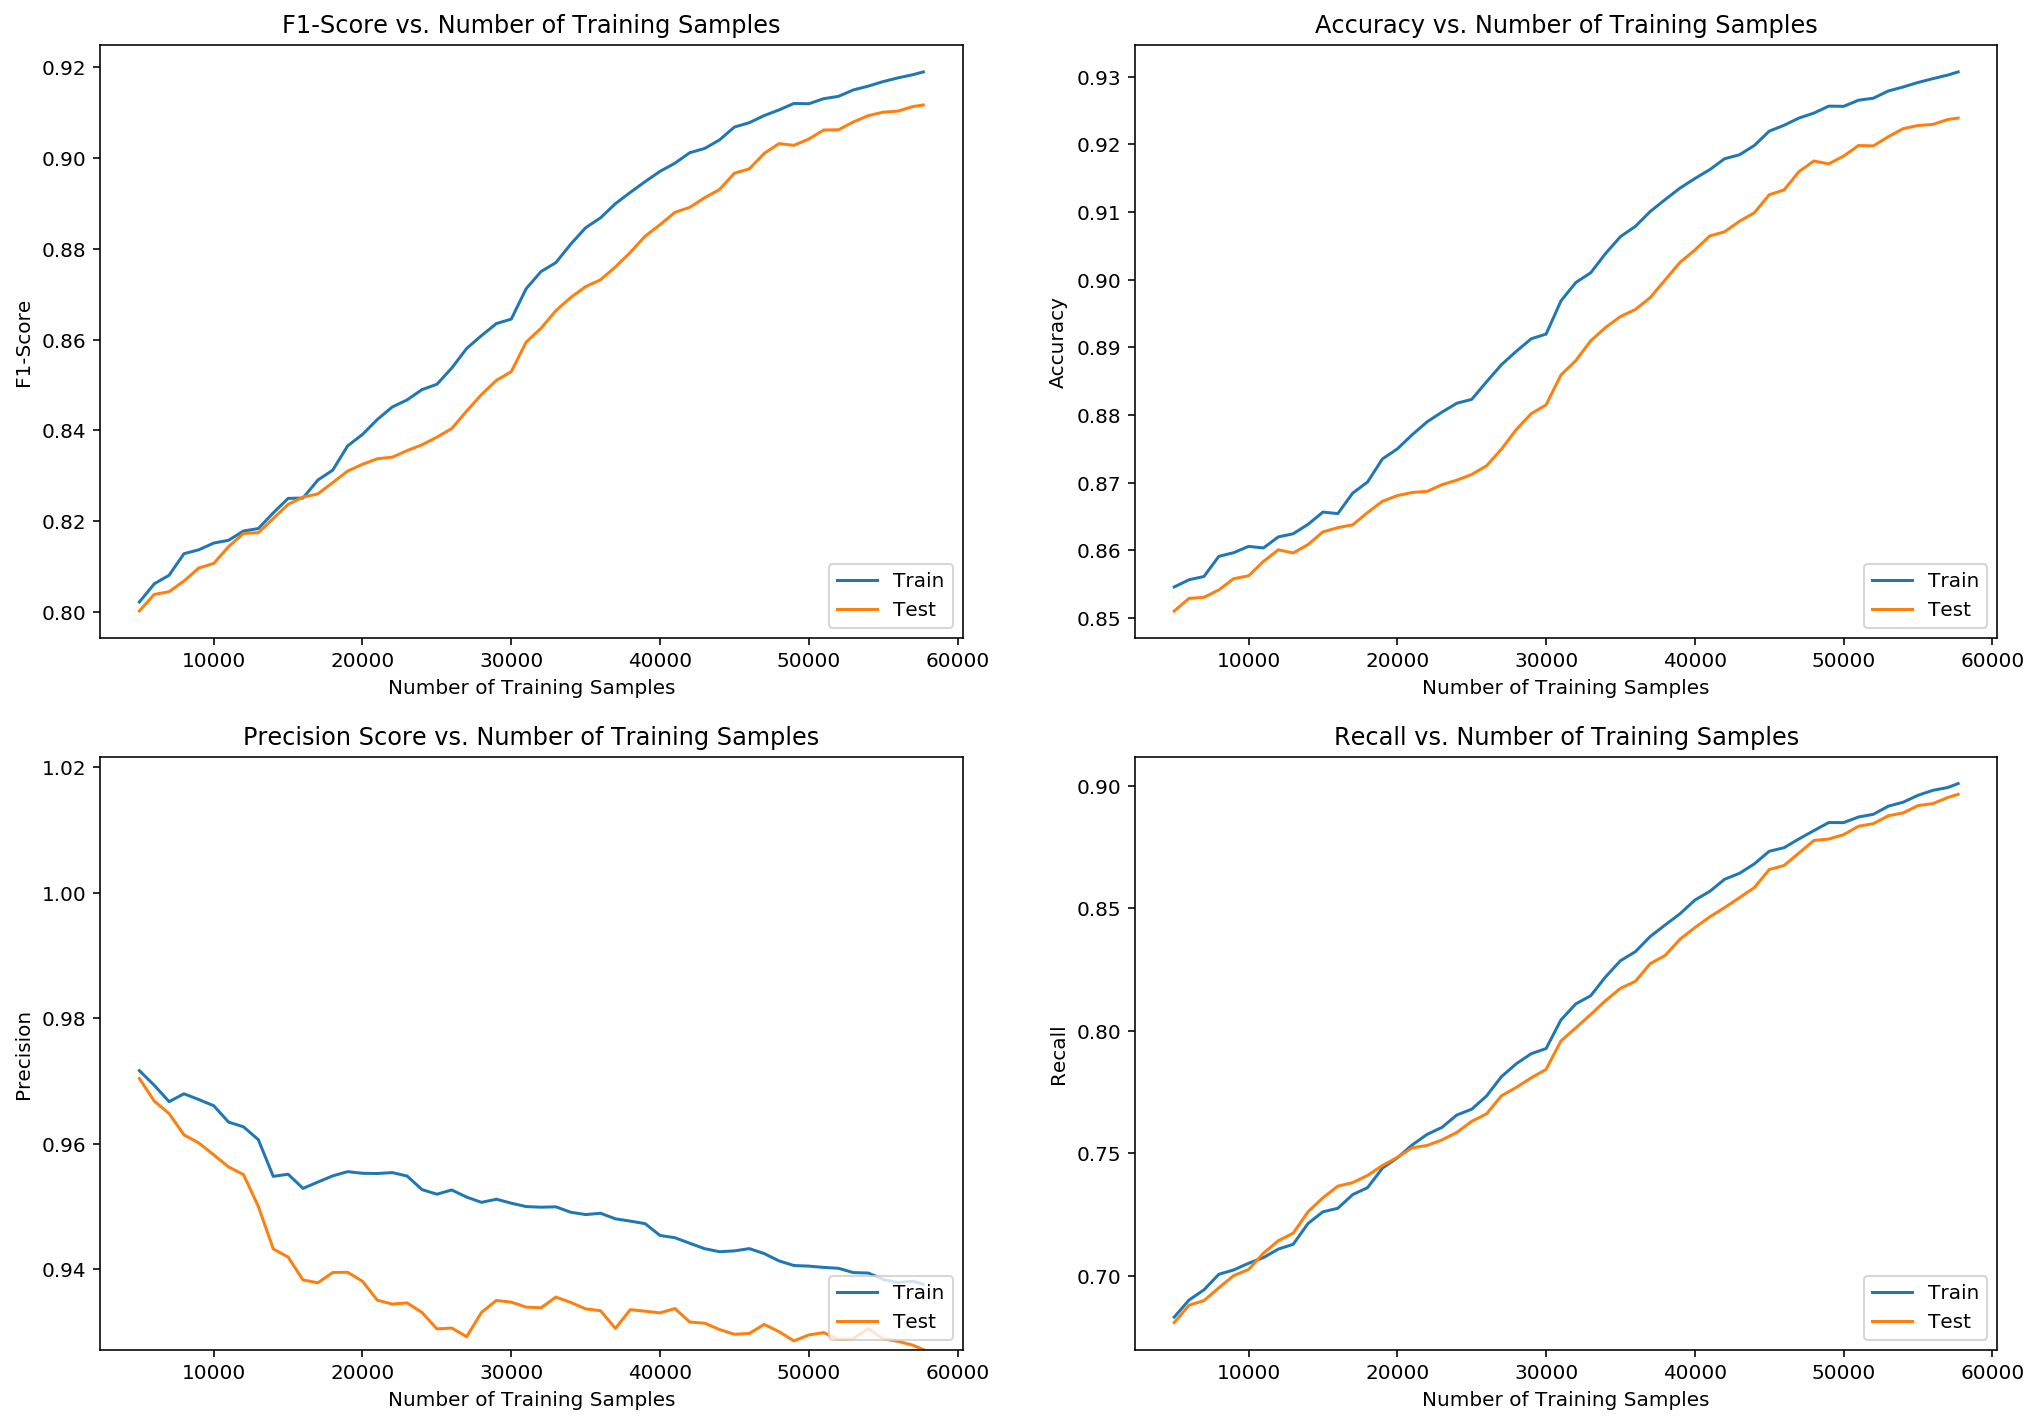

In [389]:
xtrain,xtest,ytrain,ytest = train_test_split(X_total_tfidf,y)

cv = cross_validation(lr_total, xtrain, ytrain , n_splits=5,init_chunk_size = 5000, chunk_spacings = 1000, average = "binary")
cv.validate_for_holdout_set(xtest, ytest)
cv.plot_learning_curve()

# XGBoost Classifier
##### Using all text from the dataset

In [390]:
xgb_total = XGBClassifier()

In [408]:
xgb_total.fit(X_total_tfidf_train, y_total_train)
y_xgb_total_pred = xgb_total.predict(X_total_tfidf_test)

In [457]:
X_total_tfidf_test

<15387x32032 sparse matrix of type '<class 'numpy.float64'>'
	with 3164700 stored elements in Compressed Sparse Row format>

In [392]:
# print metrics
print ("XGBoost F1 and Accuracy Scores : \n")
print ( "F1 score {:.4}%".format( f1_score(y_total_test, y_xgb_total_pred, average='macro')*100 ) )
print ( "Accuracy score {:.4}%".format(accuracy_score(y_total_test, y_xgb_total_pred)*100) )

XGBoost F1 and Accuracy Scores : 

F1 score 93.85%
Accuracy score 93.94%


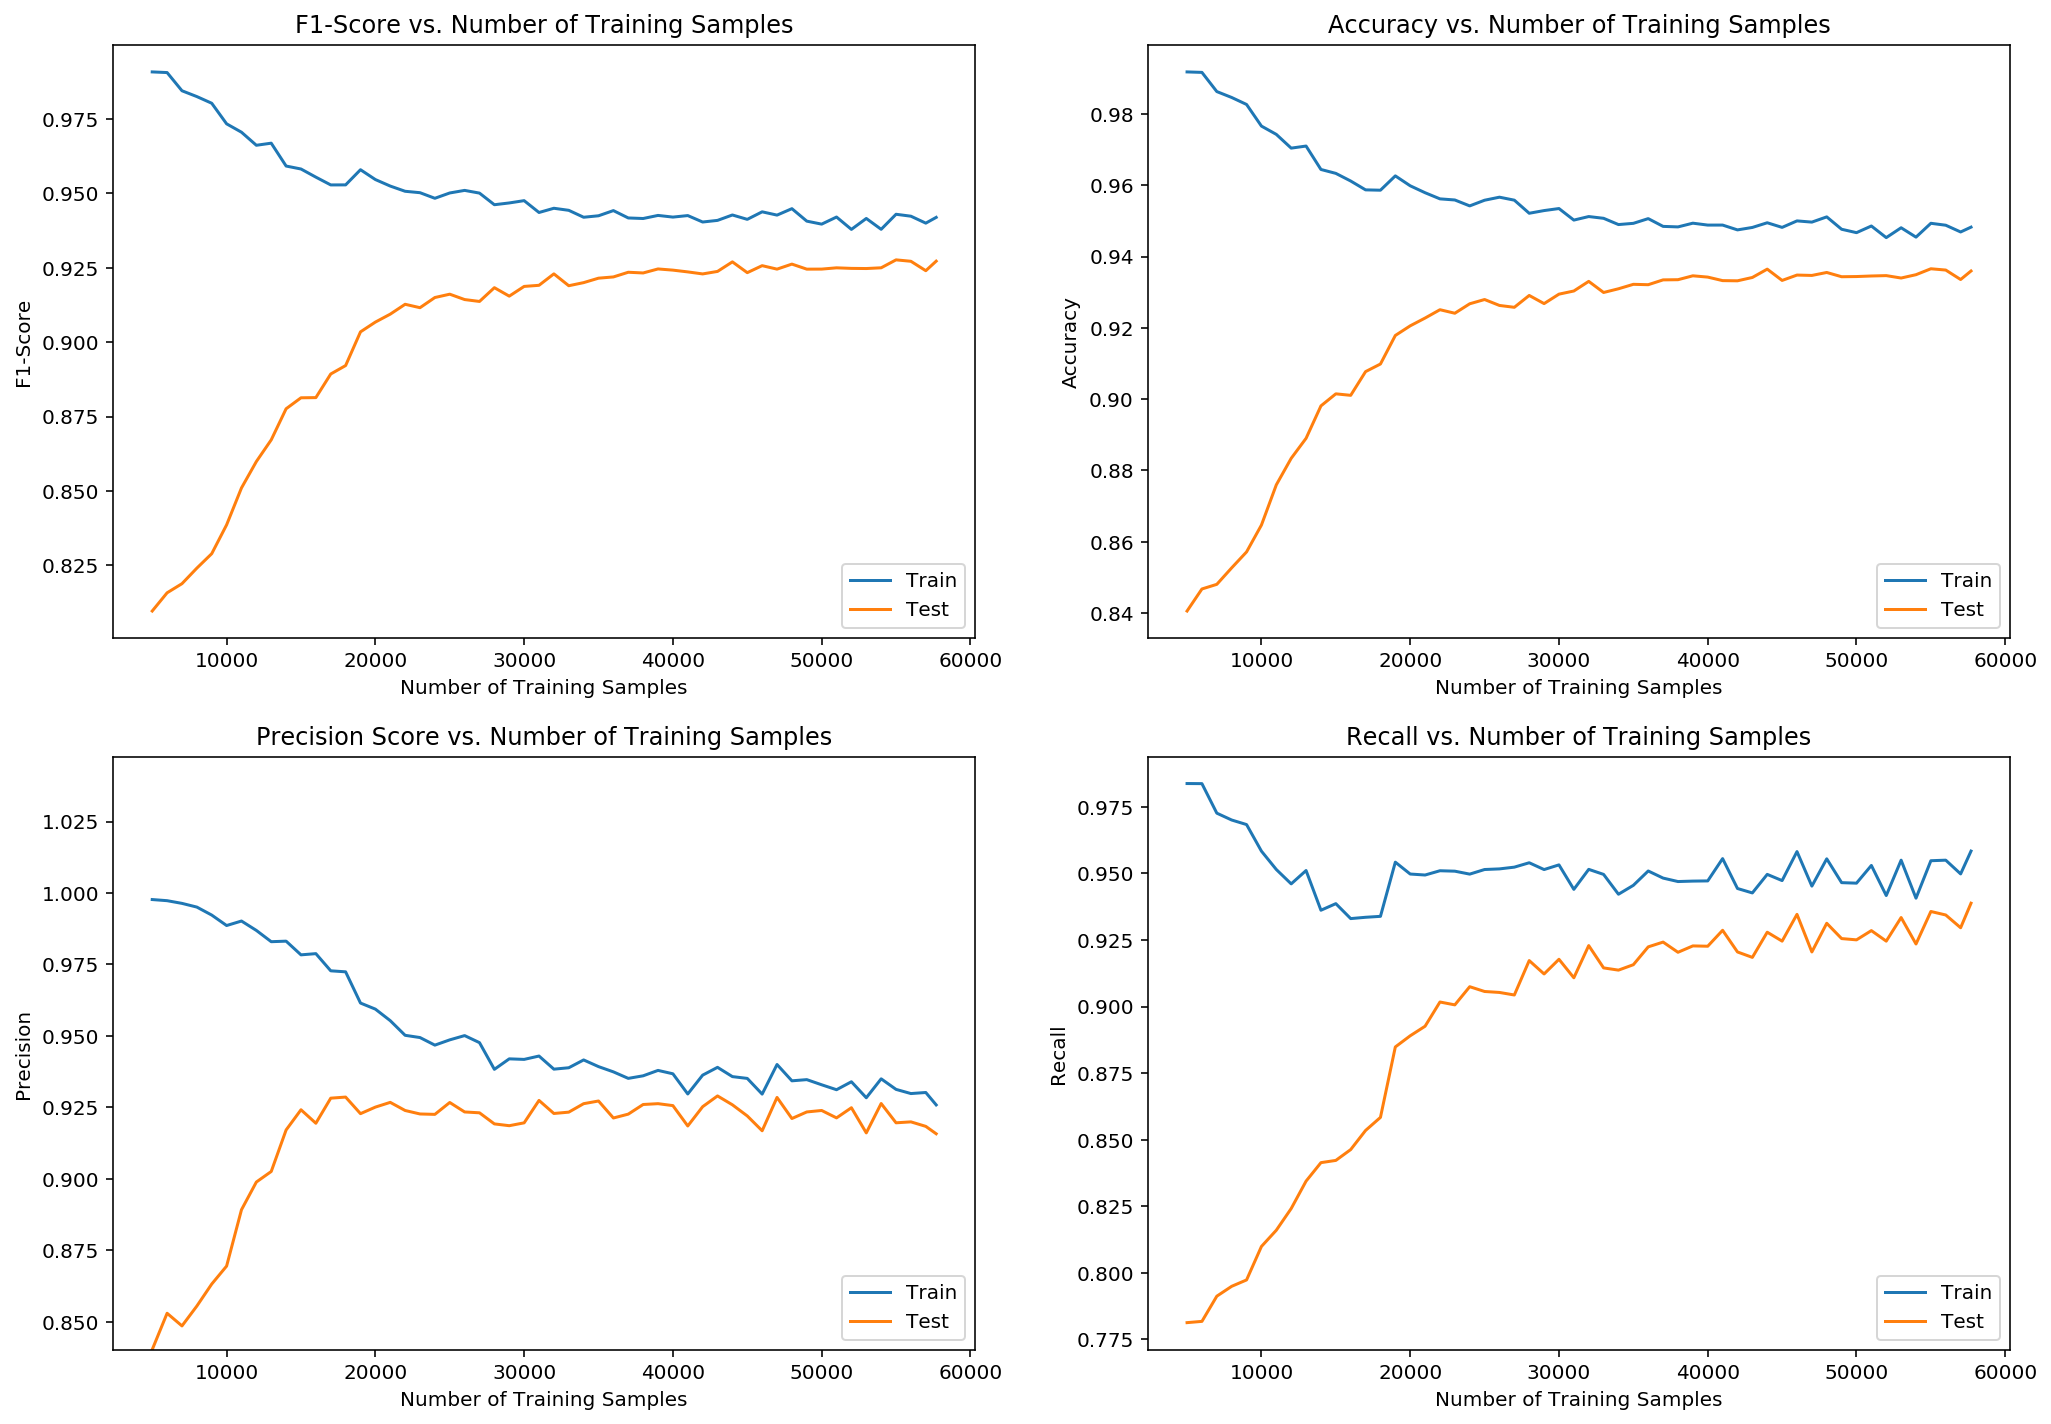

In [393]:
xtrain,xtest,ytrain,ytest = train_test_split(X_total_tfidf,y)

cv = cross_validation(xgb_total, xtrain, ytrain , n_splits=5,init_chunk_size = 5000, chunk_spacings = 1000, average = "binary")
cv.validate_for_holdout_set(xtest, ytest)
cv.plot_learning_curve()

In [395]:
xgb_total

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [396]:
## Grid Search on xg boost

In [109]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier


'''params = {
    
        'max_depth': [2,3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
        'min_child_weight': [0.0001, 0.5, 0.001,1,2,3,4,5,6,7,8,9,10],
        'gamma': [0.0,40.0,0.005,0.5, 1, 1.5, 2, 5],
        'learning_rate': [0.0005,0.01,0.1,0.3],
        'subsample': [i/10.0 for i in range(0,10)],
        'colsample_bylevel': np.round(np.arange(0.1,1.0,0.01)),
        'colsample_bytree': [i/10.0 for i in range(0,10)],
                                      }'''
params = {
        'eta':[0.02,0.1,0.3,0.8],
        'reg_alpha':[1e-5, 1e-2,0, 0.1, 1, 100],
        'max_depth': [ 4, 5, 6, 7, 8, 9],
        'min_child_weight': [1,3,6,9],
        'gamma': [0.0,0.005,0.5, 1, 1.5, 2],
        'subsample': [0.3,0.6,1],
        'colsample_bylevel': [0.3,0.5, 0.7],
        'colsample_bytree': [0.3,0.5,0.7],
                                      }

def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [110]:
xgb = XGBClassifier( n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=3, scale_pos_weight=1)

In [112]:
folds = 10
param_comb = 15

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='accuracy', n_jobs=4, cv=skf.split(X_total_tfidf_train, y_total_train), verbose=3, random_state=1001 )

# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_total_tfidf_train, y_total_train)
timer(start_time) # timing ends here for "start_time" variable

Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed: 38.0min
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed: 105.8min
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed: 126.8min finished


[00:30:39] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.



 Time taken: 2 hours 9 minutes and 7.17 seconds.


In [113]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
results.to_csv('xgb-random-grid-search-results-01.csv', index=False)


 All results:
{'mean_fit_time': array([450.90927477, 388.91044862, 148.9554426 , 250.96306126,
       292.7753077 ,  75.83549316, 295.15586352,  74.46738737,
        58.89815817,  85.43085315, 169.84618232, 217.38139439,
       228.11137826, 186.46244097,  97.0094408 ]), 'std_fit_time': array([ 7.88850868,  1.86446201, 11.05711526,  1.63266804,  4.67827979,
        0.88850235,  3.67968797,  1.370988  ,  1.49327585,  1.5055911 ,
        0.90958726,  1.22715458,  1.13537009,  0.63610103,  9.93782937]), 'mean_score_time': array([0.71659024, 0.71371717, 0.68730328, 0.75984604, 0.71133156,
       0.71598547, 0.73774838, 0.67298639, 0.62706201, 0.64792225,
       0.7062819 , 0.72597752, 0.66664696, 0.67020149, 0.6717057 ]), 'std_score_time': array([0.06781377, 0.0710956 , 0.07656321, 0.04157976, 0.06399036,
       0.0742492 , 0.04638947, 0.08929958, 0.05228404, 0.03264083,
       0.05825445, 0.04519991, 0.03738689, 0.04900289, 0.11010972]), 'param_subsample': masked_array(data=[0.6, 0.6, 1,

In [114]:
y_test = random_search.predict_proba(X_total_tfidf_test)
results_df = pd.DataFrame(data={'target':y_test[:,1]})
results_df.to_csv('submission-random-grid-search-xgb-porto-01.csv', index=False)

In [115]:
y_xgb_total_pred_random_search = random_search.predict(X_total_tfidf_test)

In [116]:
# print metrics
print ("XGBoost F1 and Accuracy Scores : \n")
print ( "F1 score {:.4}%".format( f1_score(y_total_test, y_xgb_total_pred_random_search, average='macro')*100 ) )
print ( "Accuracy score {:.4}%".format(accuracy_score(y_total_test, y_xgb_total_pred_random_search)*100) )

XGBoost F1 and Accuracy Scores : 

F1 score 94.1%
Accuracy score 94.18%


## Pipeline

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.externals import joblib
from sklearn import linear_model

/Users/saurav/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [133]:
pipelinexgbtuned = Pipeline([
    ('tfidf',TfidfVectorizer(stop_words=ENGLISH_STOP_WORDS,ngram_range=(1,3),max_df= 0.65, min_df= 0.001)),
    ('xgbt', XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.7,
              colsample_bynode=1, colsample_bytree=0.3, eta=0.1, gamma=0.0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.100000001, max_delta_step=0, max_depth=7,
              min_child_weight=3, monotone_constraints='()',
              n_estimators=600, n_jobs=3, nthread=3, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0.01,
              reg_lambda=1, scale_pos_weight=1, silent=True, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=None)),
])

In [134]:
pipelinexgbtuned.fit(X_train, Y_train)

[09:07:49] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.65, max_features=None,
                                 min_df=0.001, ngram_range=(1, 3), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=frozenset({'a', 'about', 'above',
                                                       'across', 'after',
                                                       'afte...
                               learning_rate=0.100000001, max_delta_step=0,
                               max_depth=7, min_child_weight=3, missing=nan,
                               monotone_constraints='()', n_estimators=600,
                           

In [135]:
pipelinexgbtuned.predict(["flynn hillary clinton big woman campus breitbart daniel j flynnever get feeling life circle roundabout rather head straight line toward intended destination hillary clinton remains big woman campus leafy liberal wellesley massachusetts everywhere else vote likely inauguration dress remainder day way miss havisham forever wore wedding dress speaking great expectations hillary rodham overflowed 48 year ago first addressed wellesley graduating class the president college informed gathered 1969 student needed debate far i could ascertain spokesman kind like democratic primary 2016 minus term unknown even seven sisters school i glad miss adams made clear i speaking today u 400 u miss rodham told classmate after appointing edger bergen charlie mccarthys mortimer snerds attendance bespectacled granny glass awarding matronly wisdom least john lennon wisdom took issue previous speaker despite becoming first win election seat u s senate since reconstruction edward brooke came criticism calling empathy goal protestors criticized tactic though clinton senior thesis saul alinsky lamented black power demagogue elitist arrogance repressive intolerance within new left similar word coming republican necessitated brief rebuttal trust rodham ironically observed 1969 one word i asked class rehearsal wanted say everyone came said talk trust talk lack trust u way feel others talk trust bust what say what say feeling permeates generation perhaps even understood distrusted the trust bust certainly busted clintons 2016 plan she certainly even understand people distrusted after whitewater travelgate vast conspiracy benghazi missing email clinton found distrusted voice friday there load compromising road broadening political horizon and distrust american people trump edged 48 percent 38 percent question immediately prior novembers election stood major reason closing horizon clinton described vanquisher supporter embracing lie con alternative fact assault truth reason she failed explain american people chose lie truth as history major among today know well people power invent fact attack question mark beginning end free society offered that hyperbole like many people emerge 1960s hillary clinton embarked upon long strange trip from high school goldwater girl wellesley college republican president democratic politician clinton drank time place gave degree more significantly went idealist cynic comparison two wellesley commencement address show way back lamented long leader viewed politics art possible challenge practice politics art making appears impossible possible now big woman campus odd woman white house wonder current station even possible why arent i 50 point ahead asked september in may asks isnt president the woman famously dubbed congenital liar bill safire concludes lie mind getting stood election day like finding jilted bride wedding day inspires dangerous delusion"])

array([0])

In [136]:

X_total_train, X_total_test, y_total_train, y_total_test = train_test_split(X_train,Y_train, test_size = 0.2, random_state=1234)

pipelinexgbtuned.fit(X_total_train, y_total_train)
y_xgbtuned_total_pred = pipelinexgbtuned.predict(X_total_test)
# print metrics
print ("F1 and Accuracy Scores : \n")
print ( "F1 score {:.4}%".format( f1_score(y_total_test, y_xgbtuned_total_pred, average='macro')*100 ) )
print ( "Accuracy score {:.4}%".format(accuracy_score(y_total_test, y_xgbtuned_total_pred)*100) )

[09:16:31] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


F1 and Accuracy Scores : 

F1 score 94.15%
Accuracy score 94.24%


In [137]:
#saving the pipeline
filename = 'pipelinexgbt.sav'
joblib.dump(pipeline1, filename)
filename = './pipelinexgbt.sav'

# Prediction

In [138]:
loaded_model = joblib.load(filename)
result = loaded_model.predict(["flynn hillary clinton big woman campus breitbart daniel j flynnever get feeling life circle roundabout rather head straight line toward intended destination hillary clinton remains big woman campus leafy liberal wellesley massachusetts everywhere else vote likely inauguration dress remainder day way miss havisham forever wore wedding dress speaking great expectations hillary rodham overflowed 48 year ago first addressed wellesley graduating class the president college informed gathered 1969 student needed debate far i could ascertain spokesman kind like democratic primary 2016 minus term unknown even seven sisters school i glad miss adams made clear i speaking today u 400 u miss rodham told classmate after appointing edger bergen charlie mccarthys mortimer snerds attendance bespectacled granny glass awarding matronly wisdom least john lennon wisdom took issue previous speaker despite becoming first win election seat u s senate since reconstruction edward brooke came criticism calling empathy goal protestors criticized tactic though clinton senior thesis saul alinsky lamented black power demagogue elitist arrogance repressive intolerance within new left similar word coming republican necessitated brief rebuttal trust rodham ironically observed 1969 one word i asked class rehearsal wanted say everyone came said talk trust talk lack trust u way feel others talk trust bust what say what say feeling permeates generation perhaps even understood distrusted the trust bust certainly busted clintons 2016 plan she certainly even understand people distrusted after whitewater travelgate vast conspiracy benghazi missing email clinton found distrusted voice friday there load compromising road broadening political horizon and distrust american people trump edged 48 percent 38 percent question immediately prior novembers election stood major reason closing horizon clinton described vanquisher supporter embracing lie con alternative fact assault truth reason she failed explain american people chose lie truth as history major among today know well people power invent fact attack question mark beginning end free society offered that hyperbole like many people emerge 1960s hillary clinton embarked upon long strange trip from high school goldwater girl wellesley college republican president democratic politician clinton drank time place gave degree more significantly went idealist cynic comparison two wellesley commencement address show way back lamented long leader viewed politics art possible challenge practice politics art making appears impossible possible now big woman campus odd woman white house wonder current station even possible why arent i 50 point ahead asked september in may asks isnt president the woman famously dubbed congenital liar bill safire concludes lie mind getting stood election day like finding jilted bride wedding day inspires dangerous delusion"])
print(result) 

[0]


In [149]:
abc = loaded_model.predict_proba(["flynn hillary clinton big woman campus breitbart daniel j flynnever get feeling life circle roundabout rather head straight line toward intended destination hillary clinton remains big woman campus leafy liberal wellesley massachusetts everywhere else vote likely inauguration dress remainder day way miss havisham forever wore wedding dress speaking great expectations hillary rodham overflowed 48 year ago first addressed wellesley graduating class the president college informed gathered 1969 student needed debate far i could ascertain spokesman kind like democratic primary 2016 minus term unknown even seven sisters school i glad miss adams made clear i speaking today u 400 u miss rodham told classmate after appointing edger bergen charlie mccarthys mortimer snerds attendance bespectacled granny glass awarding matronly wisdom least john lennon wisdom took issue previous speaker despite becoming first win election seat u s senate since reconstruction edward brooke came criticism calling empathy goal protestors criticized tactic though clinton senior thesis saul alinsky lamented black power demagogue elitist arrogance repressive intolerance within new left similar word coming republican necessitated brief rebuttal trust rodham ironically observed 1969 one word i asked class rehearsal wanted say everyone came said talk trust talk lack trust u way feel others talk trust bust what say what say feeling permeates generation perhaps even understood distrusted the trust bust certainly busted clintons 2016 plan she certainly even understand people distrusted after whitewater travelgate vast conspiracy benghazi missing email clinton found distrusted voice friday there load compromising road broadening political horizon and distrust american people trump edged 48 percent 38 percent question immediately prior novembers election stood major reason closing horizon clinton described vanquisher supporter embracing lie con alternative fact assault truth reason she failed explain american people chose lie truth as history major among today know well people power invent fact attack question mark beginning end free society offered that hyperbole like many people emerge 1960s hillary clinton embarked upon long strange trip from high school goldwater girl wellesley college republican president democratic politician clinton drank time place gave degree more significantly went idealist cynic comparison two wellesley commencement address show way back lamented long leader viewed politics art possible challenge practice politics art making appears impossible possible now big woman campus odd woman white house wonder current station even possible why arent i 50 point ahead asked september in may asks isnt president the woman famously dubbed congenital liar bill safire concludes lie mind getting stood election day like finding jilted bride wedding day inspires dangerous delusion"])

In [160]:
print(round(abc[0][0] * 100, 2))

66.87
